In [1]:
import sys
sys.path.append("../src/")
from ECALDataAnalyzer import ECALDataAnalyzer
from plot_tools_ecal import plot_ecal_peaks, plot_ecal_peaks_with_intersections
from TrainData import TrainData
import pandas as pd

In [2]:
ana = ECALDataAnalyzer(input_filename = '../projects/test.08.09.2024.13.18/cooked/___2.0___15.0___0.0___0.01___0.01___0.01___neutron___.hipo',
                       output_filename = 'output.csv')
ana.process_hipo()

100it [00:07, 12.97it/s]


Processing complete. Intersection data saved to output-intersections.csv


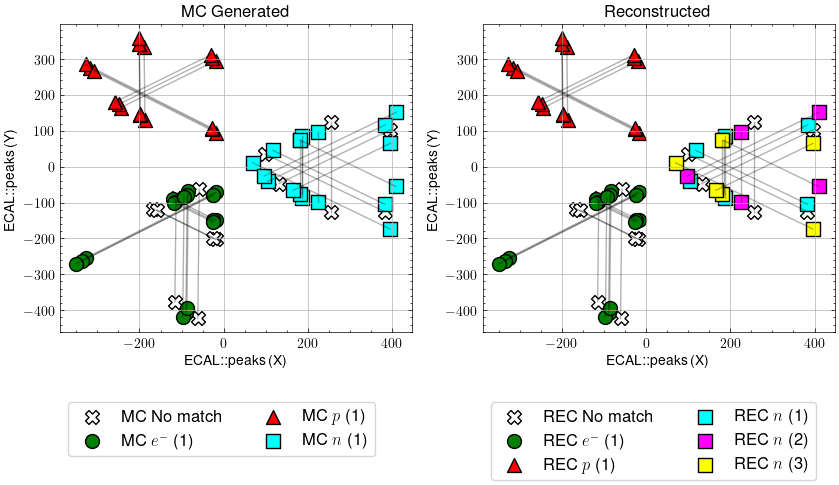

In [3]:
plot_ecal_peaks("output.csv", event_number=41)

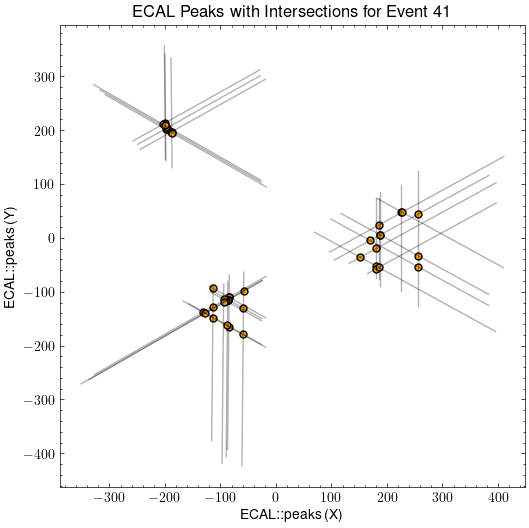

In [4]:
plot_ecal_peaks_with_intersections("output.csv", "output-intersections.csv",event_number=41)

In [6]:
data.get_train_data().columns

Index(['file_number', 'file_event_number', 'global_event_number',
       'unique_mc_index', 'mc_pid', 'energy_A', 'energy_B', 'time_A', 'time_B',
       'x_rot', 'y_rot', 'sector_1', 'sector_2', 'sector_3', 'sector_4',
       'sector_5', 'sector_6', 'layer_A_1', 'layer_A_2', 'layer_A_3',
       'layer_A_4', 'layer_A_5', 'layer_A_6', 'layer_A_7', 'layer_A_8',
       'layer_A_9', 'layer_B_1', 'layer_B_2', 'layer_B_3', 'layer_B_4',
       'layer_B_5', 'layer_B_6', 'layer_B_7', 'layer_B_8', 'layer_B_9'],
      dtype='object')